## Example visualizations of hyperparameter tuning for reconstruction

In [1]:
import warnings as wn
wn.filterwarnings("ignore")

import os
import numpy as np
import fuller
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect
from h5py import File
import natsort as nts
import glob as g
from mpes import analysis as aly, visualization as vis
import matplotlib as mpl
import scipy.io as sio
%matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

colornames = ['#646464', '#666666', '#6a6a6a', '#6f6f6f', '#737373', '#787878', '#7d7d7d', '#828282', '#878787', '#8d8d8d', '#929292', '#989898', '#9e9e9e', '#a4a4a4', '#aaaaaa', '#b0b0b0', '#b6b6b6', '#bcbcbc', '#c2c2c2', '#c9c9c9', '#cfcfcf', '#d6d6d6', '#dcdcdc', '#e3e3e3', '#eaeaea', '#efefee', '#efeee5', '#efeddc', '#efecd3', '#eeebca', '#eeeac0', '#eee9b7', '#eee8ad', '#ede7a4', '#ede69a', '#ede590', '#ede487', '#ece37d', '#ece273', '#ece069', '#ecdf5f', '#ebde55', '#ebdd4b', '#ebdc41', '#ebdb37', '#ebd333', '#ebc933', '#ecbe32', '#ecb432', '#eda931', '#ee9e31', '#ee9330', '#ef8830', '#ef7d2f', '#f0722f', '#f0672e', '#f15c2e', '#f2512d', '#f2462d', '#f33b2c', '#f3302c', '#f4252b', '#f4192b', '#ef182f', '#e81834', '#e21939', '#db1a3e', '#d51a43', '#ce1b48', '#c71b4d', '#c11c52', '#ba1c58', '#b31d5d', '#ac1d62', '#a61e67', '#9f1e6c', '#981f72', '#911f77', '#8a207c', '#842182']
custom_cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', colornames, N=256)

# Create plot folder if needed
if not os.path.exists('../results/figures'):
    os.mkdir('../results/figures')

In [3]:
# Load reconstruction data
fdir = r'../data/hyperparameter/tuning_SFig3'
flist = fuller.utils.findFiles(fdir, fstring='/*', ftype='h5')

recband = []
for f in flist:
    with File(f) as file:
        recband.append(file['bands/Eb'][:])
recband = np.asarray(recband)
recband.shape

(154, 256, 256)

In [4]:
# Reshape the reconstruction data into a grid for plotting
smaband = recband.reshape((14, 11, 256, 256))[::2, 1::2, ...].reshape((35, 256, 256))
smaband.shape

(35, 256, 256)

In [5]:
# Generate circular mask for the data
msk = aly.circmask(recband[0,...], 128, 125, 115, sign='xnan', method='algebraic')

# Ranges of hyperparameters
etas = np.around(np.arange(0.02, 0.29, 0.02), decimals=2)
shifts = np.around(np.arange(0.0, 0.51, 0.05), decimals=2)

# Obtain axis values of kx, ky
axes = fuller.utils.loadHDF(flist[0], groups=['axes'])
kx, ky = axes['kx'], axes['ky']

### Supplementary Figure 4a

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


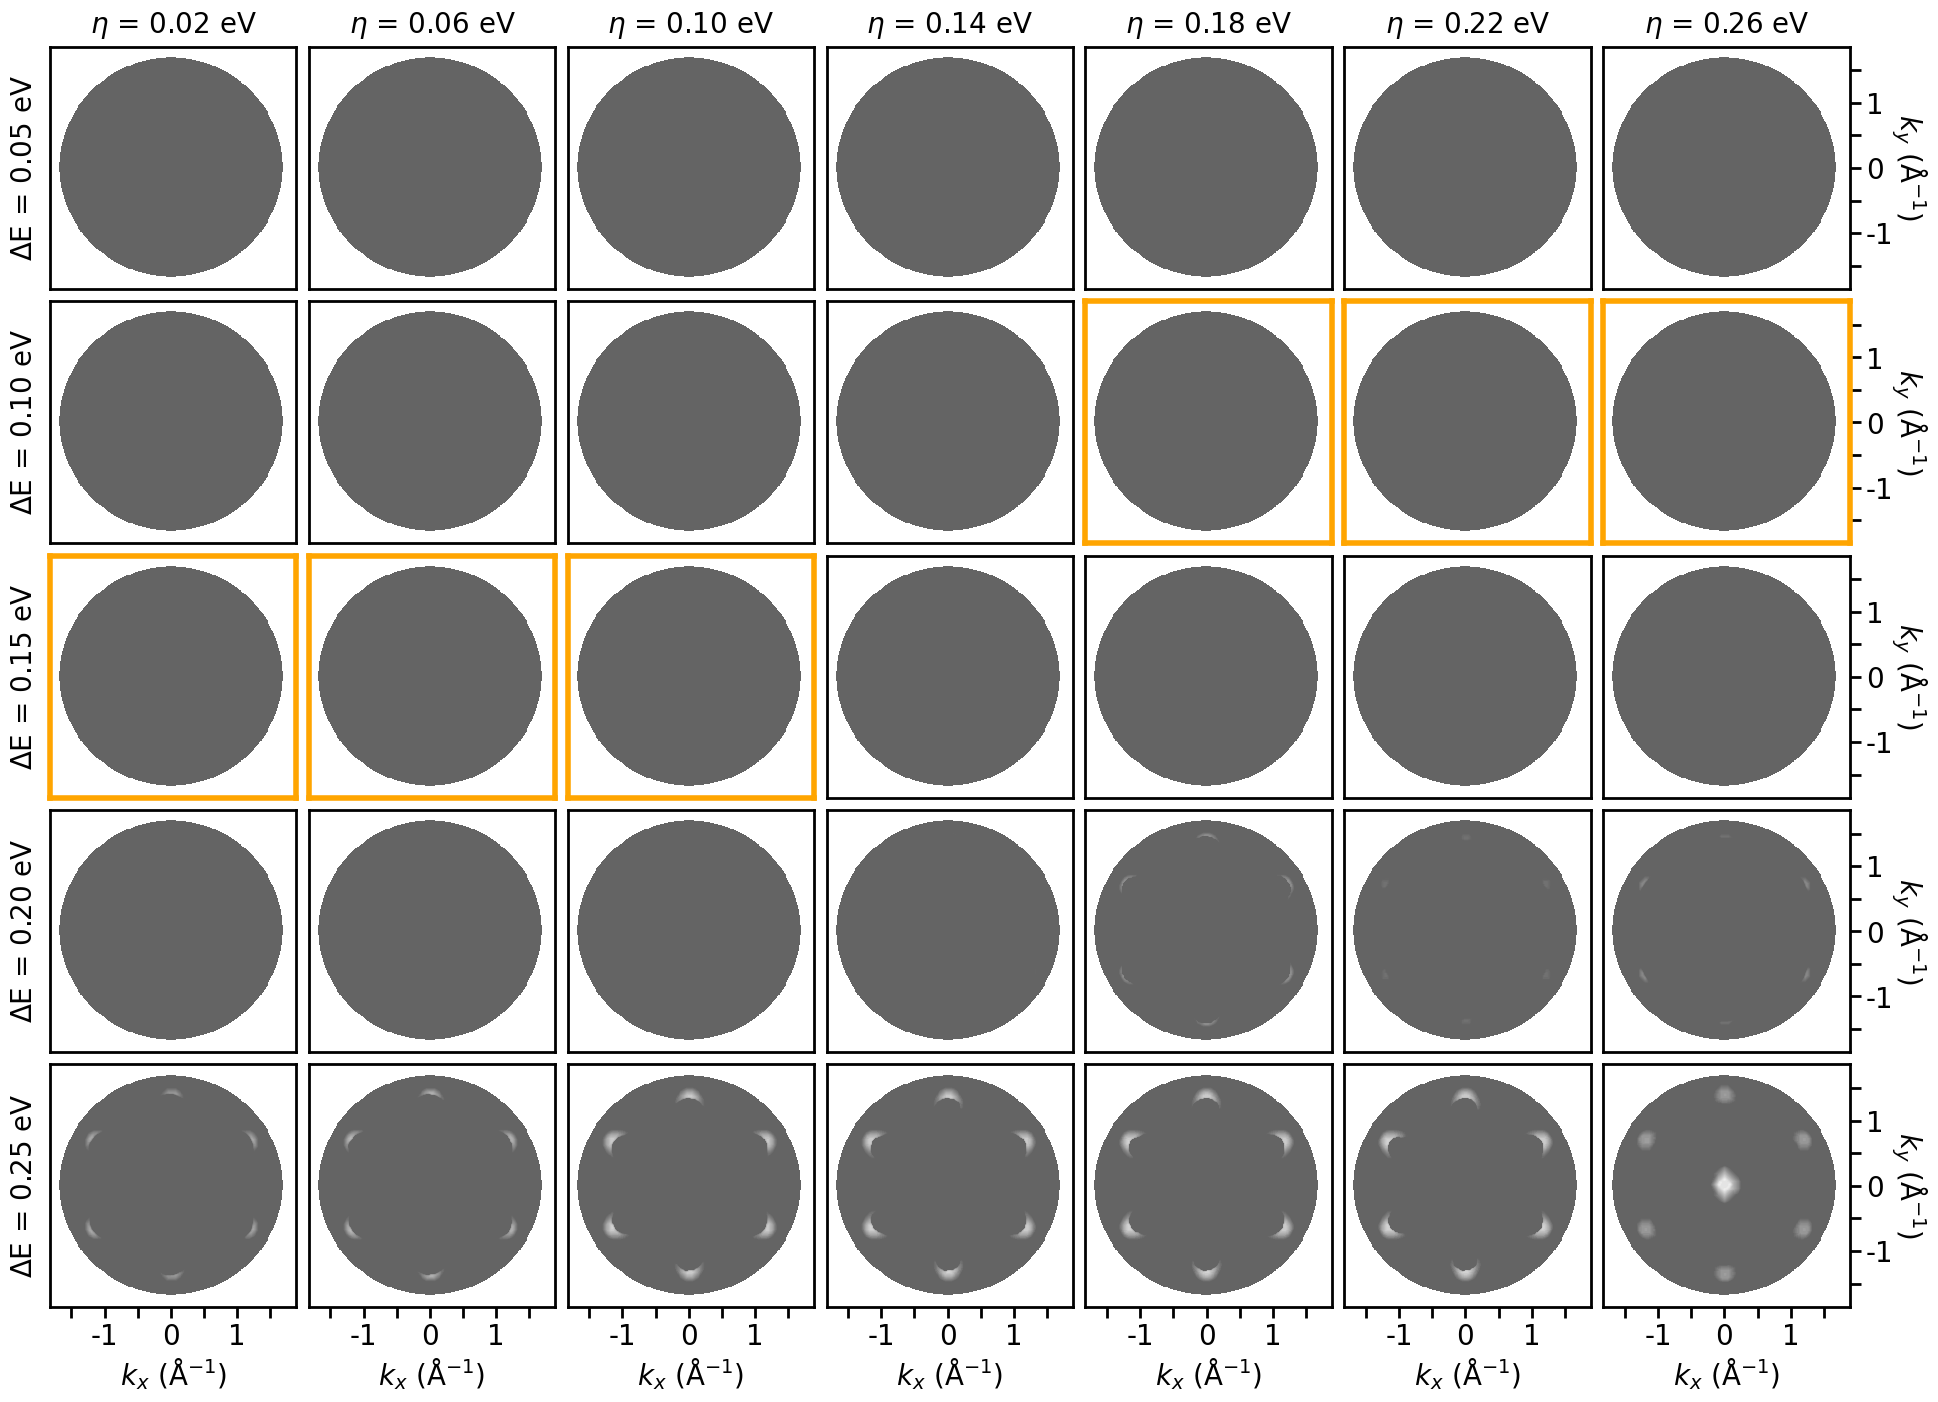

In [6]:
# Plot a grid of reconstructed bands
ims, axs = vis.sliceview3d(smaband*msk[None,...], axis=0, ncol=7, vmin=-1, vmax=0,
                           colormap=custom_cmap, axisreturn='nested', numbered=False, figsize=(20, 20*5/7),
                          imkwds={'extent':[kx[0]+0.05, kx[-1]+0.05, ky[0]-0.02, ky[-1]-0.02]});

# Annotate the plot-frames of good reconstructions
pairs = [[1, 4], [1, 5], [1, 6], [2, 0], [2, 1], [2, 2]]
for ri, ci in pairs:
    [i.set_linewidth(4) for i in axs[ri, ci].spines.values()]
    [i.set_color('#FFA500') for i in axs[ri, ci].spines.values()]

# Annotate figures on the uppermost and bottommost rows
for j in range(7):
    jj = j*2
    axs[0, j].set_title('$\eta$ = '+str("%1.2f" %etas[jj])+' eV', fontsize=20, pad=10)
    
    axs[-1, j].get_xaxis().set_visible(True)
    axs[-1, j].set_xticks(np.arange(-1.5, 1.6, 0.5))
    axs[-1, j].set_xticklabels(['', '-1', '', '0', '', '1', ''])
    axs[-1, j].tick_params(axis='x', length=8, width=2, labelsize=20)
    axs[-1, j].set_xlabel('$k_x$ ($\mathrm{\AA}^{-1}$)', fontsize=20)

# Annotate figures on leftmost and rightmost columns
for i in range(5):
    ii = i+1
    axs[i, 0].get_yaxis().set_visible(True)
    axs[i, 0].set_yticks([])
    axs[i, 0].set_ylabel('$\Delta$E = '+str("%1.2f" %shifts[ii])+' eV', fontsize=20, labelpad=5)
    
    axs[i, -1].get_yaxis().set_visible(True)
    axs[i, -1].yaxis.set_label_position("right")
    axs[i, -1].yaxis.tick_right()
    axs[i, -1].set_yticks(np.arange(-1.5, 1.6, 0.5))
    axs[i, -1].set_yticklabels(['', '-1', '', '0', '', '1', ''])
    axs[i, -1].tick_params(axis='y', length=8, width=2, labelsize=20)
    axs[i, -1].set_ylabel('$k_y$ ($\mathrm{\AA}^{-1}$)', fontsize=20, rotation=-90, labelpad=25)

plt.subplots_adjust(
        left=0.05,
        right=0.95,
        bottom=0.05,
        top=0.95,
        wspace=0.05,
        hspace=0.05)

plt.savefig(r'../results/figures/sfig_4a.png', transparent=False, bbox_inches='tight', dpi=300)

In [ ]:
# Plot the colorbar
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0.05, 0.80, 0.04, 0.5])
norm = mpl.colors.Normalize(vmin=-1, vmax=0)
cb = mpl.colorbar.ColorbarBase(ax, cmap=custom_cmap,
                                norm=norm, ticks=[-1, 0],
                                orientation='vertical')
# cb.ax.set_yticks([-1, 0])
cb.ax.set_yticklabels(['low', 'high'], fontsize=20)
cb.ax.set_ylabel('E (eV)', fontsize=20, rotation=-90, labelpad=-10)
cb.ax.tick_params(axis='y', length=0, pad=5)

In [ ]:
# Energy coordinates
elo, ehi = (0.0, -8.252199)
eshift = 0.65 # global shift
elo += eshift
ehi += eshift

# Extract high-symmetry lines from reconstructed bands
pth = np.load(r'../data/hyperparameter/tuning_SFig3/path_coords.npz')
# pth = np.load(r'../data/processed/hslines/WSe2_kpath.npz')
rowInds, colInds = pthr, pthc = pth['pathr'], pth['pathc']
bcuts = aly.bandpath_map(smaband, pathr=rowInds, pathc=colInds, eaxis=0)
bcuts = bcuts.reshape((5, 7, 186))

# Photoemission data cut along high-symmetry lines
vcut = np.load(r'../data/processed/hslines/WSe2_vcut.npy')

# Load LDA-DFT band structure calculation along high-symmetry lines
bandlines = sio.loadmat(r'../data/theory/hslines/WSe2_bandlines_LDA_186.mat')['lines']
bandlines.shape

### Supplementary Figure 4b

In [ ]:
# Plot a grid of photoemission data cuts along high symmetry lines
ims, axs = vis.sliceview3d(np.tile(vcut[::-1,:], (35, 1, 1)), axis=0, ncol=7, imkwds={'extent':[0, 185, ehi, elo]},
                           colormap='Blues', axisreturn='nested', numbered=False, figsize=(20, 10));

# Annotate the plot-frames of good reconstructions
shifts_small = np.arange(0.10, 0.31, 0.05)
pairs = [[1, 4], [1, 5], [1, 6], [2, 0], [2, 1], [2, 2]]
pairs = [[1, 4], [1, 5], [1, 6], [2, 0], [2, 1], [2, 2]]
for ri, ci in pairs:
    [i.set_linewidth(4) for i in axs[ri, ci].spines.values()]
    [i.set_color('#FFA500') for i in axs[ri, ci].spines.values()]

# Plot reconstructions and initializations
pos = np.array([  0,  69, 107, 185]) # High-symmetry point locations
for j in range(7):
    for i in range(5):
        axs[i, j].plot(bcuts[i, j, :] + 0.65, '-', c='r', lw=1, zorder=2) # Plot reconstruction
        axs[i, j].plot(bandlines[:, 1] + 0.65 + 0.02*i, '-', c='#00FF00', lw=1, zorder=1) # Plot initialization
        
        # Annotate high symmetry positions
        for p in pos[:-1]:
            axs[i, j].axvline(x=p, c='k', ls='--', lw=2, dashes=[4, 3])

# Annotate figures on the uppermost and bottommost rows
for j in range(7):
    jj = j*2
    axs[0, j].set_title('$\eta$ = '+str("%1.2f" %etas[jj])+' eV', fontsize=20, pad=10)
    
    axs[-1, j].get_xaxis().set_visible(True)
    axs[-1, j].tick_params(axis='both', length=8, width=2, labelsize=15)
    axs[-1, j].set_ylim([ehi, elo])
    axs[-1, j].set_xticks(pos)
    axs[-1, j].set_xticklabels(['$\overline{\Gamma}$', '$\overline{\mathrm{M}}$',
                           '$\overline{\mathrm{K}}$', '$\overline{\Gamma}$'])

# Annotate figures on leftmost and rightmost columns
for i in range(5):
    ii = 1 + i*2
    axs[i, 0].get_yaxis().set_visible(True)
    axs[i, 0].set_yticks([])
    axs[i, 0].set_ylabel('$\Delta$E = '+str("%1.2f" %shifts[i])+' eV', fontsize=20, labelpad=5)
    
    axs[i, -1].get_yaxis().set_visible(True)
    axs[i, -1].set_yticks(np.arange(-7, 0.1))
    axs[i, -1].set_yticklabels(['', '-6', '', '-4', '', '-2', '', '0'])
    axs[i, -1].set_ylabel('E (eV)', fontsize=20, rotation=-90, labelpad=20)
    axs[i, -1].yaxis.set_label_position("right")
    axs[i, -1].yaxis.tick_right()
    axs[i, -1].tick_params(axis='y', length=8, width=2, labelsize=20)

plt.subplots_adjust(
        left=0.05,
        right=0.95,
        bottom=0.05,
        top=0.95,
        wspace=0.05,
        hspace=0.08)

plt.savefig(r'../results/figures/sfig_4b.png', transparent=True, bbox_inches='tight', pad_inches=0.05, dpi=300)

In [ ]:
# Plot the figure legend
fig, ax = plt.subplots(figsize=(8, 3))
ax.imshow(vcut, cmap='Blues', extent=[0, 185, ehi, elo], aspect=12)
ax.tick_params(axis='both', length=0)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(bandlines[:, 1] + 0.65 + 0.05*i, '-', c='#00FF00', lw=1, zorder=1, label='Initialization')
ax.plot(bcuts[i, j, :] + 0.65, '-', c='r', lw=1, zorder=2, label='Reconstruction')
ax.legend(loc=9, fontsize=15, frameon=True, bbox_to_anchor=(1.2, 0.2), facecolor='#C0C0C0')